In [1]:
import os
import json
import random
import shutil
import matplotlib.pyplot as plt 
import numpy as np  

### Paths

In [2]:
path_dataset=os.path.join("./fc-clip/datasets", "cityscapes")
path_getFine=os.path.join(path_dataset, "gtFine")
path_leftImg8bit=os.path.join(path_dataset, "leftImg8bit")

In [3]:
path_getFine_train=os.path.join(path_getFine, "train")
path_getFine_val=os.path.join(path_getFine, "val")
path_getFine_test=os.path.join(path_getFine, "test")
path_getFine_cityscapes_panoptic_train=os.path.join(path_getFine, "cityscapes_panoptic_train")
path_getFine_cityscapes_panoptic_val=os.path.join(path_getFine, "cityscapes_panoptic_val")
path_getFine_cityscapes_panoptic_test=os.path.join(path_getFine, "cityscapes_panoptic_test")

cityscapes_panoptic_train=os.path.join(path_getFine, "cityscapes_panoptic_train_old.json")
cityscapes_panoptic_val=os.path.join(path_getFine, "cityscapes_panoptic_val.json")
cityscapes_panoptic_test=os.path.join(path_getFine, "cityscapes_panoptic_test.json")


In [4]:
with open(cityscapes_panoptic_train, 'r') as json_file:
    data = json.load(json_file)
print(data.keys())
print(len(data['categories']),len(data['images']),len(data['annotations']))
print(data['images'][0])
print(data['categories'][0])

dict_keys(['annotations', 'categories', 'images'])
19 2975 2975
{'file_name': 'aachen_000000_000019_gtFine_leftImg8bit.png', 'height': 1024, 'id': 'aachen_000000_000019', 'width': 2048}
{'color': [128, 64, 128], 'id': 7, 'isthing': 0, 'name': 'road', 'supercategory': 'flat'}


In [5]:
class_n={}
for k in range(len(data["annotations"])):
    for i in  data["annotations"][k]["segments_info"]:
        if i["category_id"] in class_n:
            class_n[i["category_id"]]+=1
        else:
            class_n[i["category_id"]]=1 

In [6]:
s_s=0
t_s=0
for i in class_n:
    if i<24:
        s_s+=class_n[i]
    else:
        t_s+=class_n[i]
print('The persentage of things:',(t_s/(s_s+t_s))*100)
print('The persentage of Stuff:',(s_s/(s_s+t_s))*100)


The persentage of things: 67.87108761974112
The persentage of Stuff: 32.12891238025888


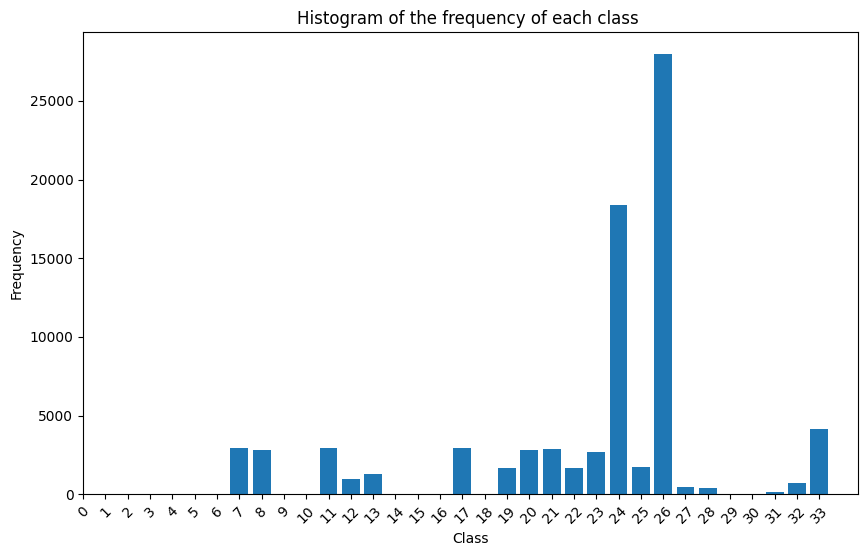

In [7]:
 
keys = list(class_n.keys())
values = list(class_n.values())
plt.figure(figsize=(10, 6))  
plt.bar(keys, values)
 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of the frequency of each class ')
 
plt.xticks(rotation=45)
plt.xticks(range(34), range(34))
# Show plot
plt.show()